In [5]:
run FunctionsLoader.ipynb

0.2.0_4
0.2.0_4


In [455]:
class CorPlot():
        
    def __init__(self, input_representation, sd_ratio):
        self.input_representation = input_representation
        self.sd_ratio = sd_ratio
        self.time_window = -1
        
    def readCorResults(self, file_path):
        f = open(file_path, "rb")
        reader = csv.reader(f)
        cor_results = list(row for row in reader)
        f.close()
        return cor_results
    
    def findBestTimeWindow(self):
        cors = []
        pvals = []
        for tw in [10, 30, 60]:
            file_path = 'results/cor_time_window' + str(tw) + '_sd_ratio_' + str(int(1/self.sd_ratio)) + '_input_' + str(self.input_representation) + '.csv'
            result = self.readCorResults(file_path)
            #get features
            features = list(set([r[3] for r in result])) 
            
            # compute avg cor for each feature
            avg_cors = []
            avg_pvals = []
            for f in features: 
                f_cor = [abs(float(r[1])) for r in result if r[3]==f]
                f_pval = [abs(float(r[2])) for r in result if r[3]==f]
                avg_cors.append(np.nanmean(f_cor))
                avg_pvals.append(stats.combine_pvalues(method='fisher',pvalues=f_pval)[1])
        
            cors.append(avg_cors)
            pvals.append(avg_pvals)
        
        best_index = -1
        best_avg = 0
        for i in range(len(cors)):
            if best_avg < np.mean(cors[i]):
                best_index = i
        self.time_window = [10, 30, 60][best_index]
        
        
    def computeAvgCor(self):
        file_path = 'results/cor_time_window' + str(self.time_window) + '_sd_ratio_' + str(int(1/self.sd_ratio)) + '_input_' + str(self.input_representation) + '.csv'
        result = self.readCorResults(file_path)
        #get features
        features = list(set([r[3] for r in result])) 
        # compute avg cor for each feature
        avg_cors = []
        avg_pvals = []
        for f in features: 
            f_cor = [abs(float(r[1])) for r in result if r[3]==f]
            f_pval = [abs(float(r[2])) for r in result if r[3]==f]
            avg_cors.append(np.nanmean(f_cor))
            avg_pvals.append(stats.combine_pvalues(method='fisher',pvalues=f_pval)[1])
        # print results
        print np.mean(avg_cors)
        print avg_cors
        print avg_pvals
        
        
    def createCorDataFrame(self):
        file_path = 'results/cor_time_window' + str(self.time_window) + '_sd_ratio_' + str(int(1/self.sd_ratio)) + '_input_' + str(self.input_representation) + '.csv'
        result = self.readCorResults(file_path)
        #get users
        users = list(set([r[0] for r in result]))
        #get features
        features = sorted(list(set([r[3] for r in result])))
        #create empty data frame (row:user & col:features)
        df_cor = pd.DataFrame(data=[[0.0]*len(features)]*len(users), columns=features, index=users) 
        #return df_cor
        # get correlations
        for u in users:
            for f in features: 
                uf_cor = [float(r[1]) for r in result if r[0]==u and r[3]==f]
                uf_pval = [float(r[2]) for r in result if r[0]==u and r[3]==f]
                if uf_pval[0] > 0.1: #set cor as 0 where pval is not significant 
                    uf_cor = [0]
                if uf_cor[0] != uf_cor[0]: # it is a nan
                    uf_cor = [0]
                df_cor = df_cor.set_value(u, f, uf_cor[0])
        # set col & row names
        df_cor.index = ['User ' + str(i+1) for i in range(len(users))]
        df_cor.columns = ['F' + str(i+1) for i in range(len(features))]
        return df_cor
    
    @staticmethod
    def plotHeatMap(df, file_path=''):
        sns.set(style="white") 
        f, ax = plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
        cmap = sns.diverging_palette(220, 10, as_cmap=True) # Generate a custom diverging colormap
        sns_plot = sns.heatmap(df, cmap=cmap, vmax=.6, vmin=-.6, center=0, robust=True, linecolor='white',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw the heatmap 
        if len(file_path) > 0:
            sns_plot.figure.savefig(file_path)
            
            
    @staticmethod
    def plotHistograms(df, file_path=''):
            fig, ax = plt.subplots(3, 10, figsize=(30, 9))
            x,y=0,0
            for f in df.columns:
                values = df.loc[:,f]
                #print values
                ax[x, y].hist(values, normed=False)
                ax[x, y].set_title(f)
                if(y == 9):
                    x += 1
                    y = 0
                else:
                    y += 1
            
            fig.tight_layout()
            fig.show()
            
            if len(file_path) > 0:
                plt.savefig(file_path)
            

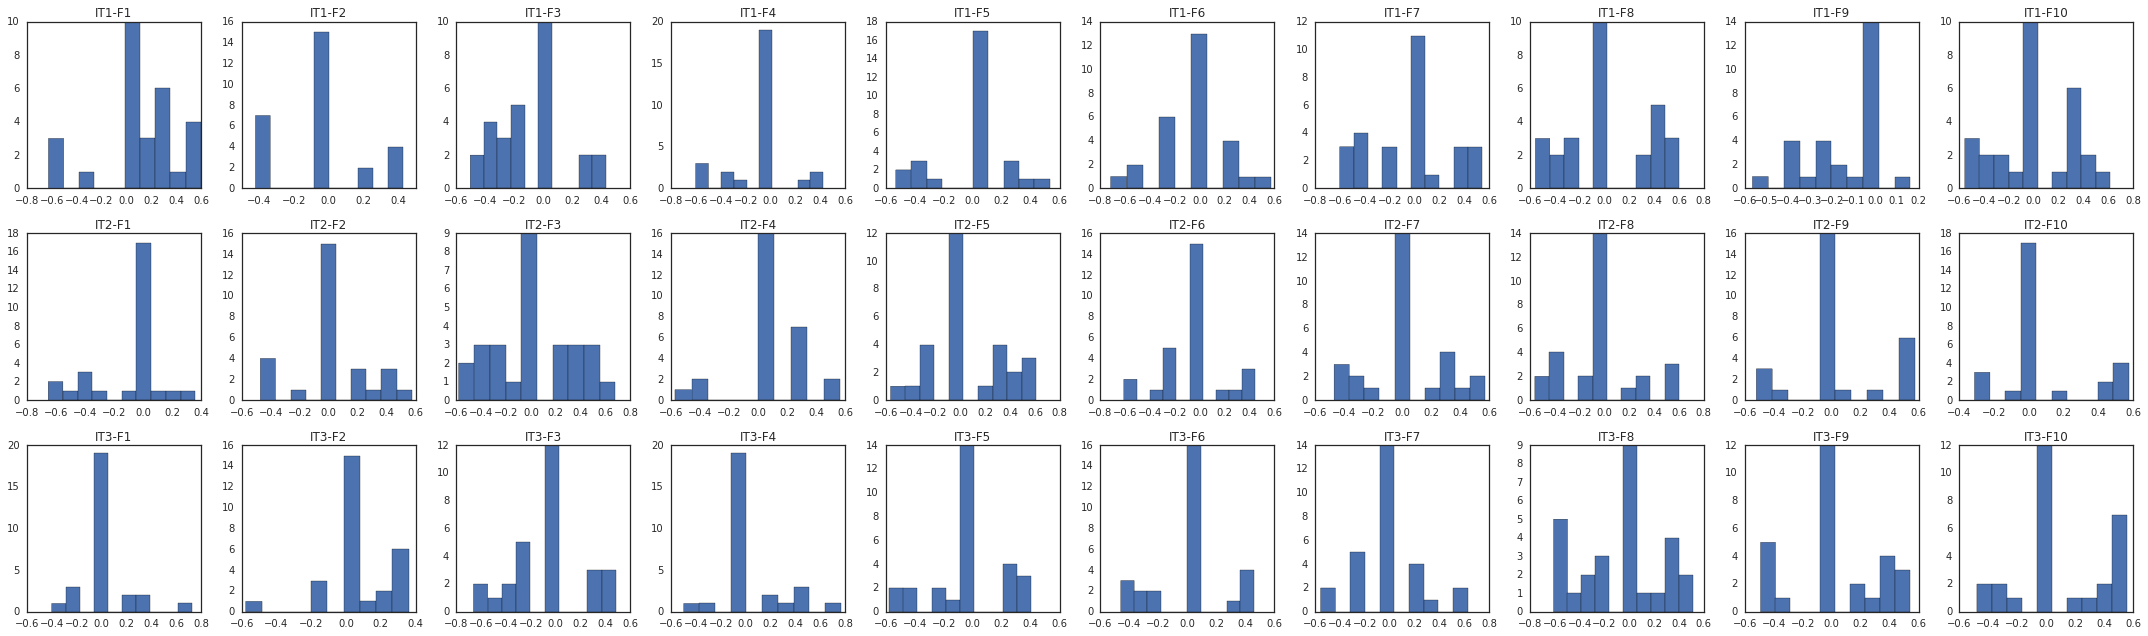

In [457]:
CorPlot.plotHistograms(df=data2, file_path='plots/corr_plot_hist.pdf')

In [377]:
# cp = CorPlot(input_representation=3, sd_ratio=0.25)
# cp.findBestTimeWindow()
# a = cp.createCorDataFrame()
# CorPlot.plotHeatMap(a, file_path="plots/output.eps")

[['IT1-F1', 0.25728261542878567],
 ['IT1-F2', 0.16666221754157143],
 ['IT1-F3', 0.20866201141603571],
 ['IT1-F4', 0.13452349542335715],
 ['IT1-F5', 0.14589603402824999],
 ['IT1-F6', 0.19015838085032141],
 ['IT1-F7', 0.24327480977032143],
 ['IT1-F8', 0.26978952837567854],
 ['IT1-F9', 0.14295004371453571],
 ['IT1-F10', 0.23027758665264283],
 ['IT2-F1', 0.14249187586532144],
 ['IT2-F2', 0.16999948480467861],
 ['IT2-F3', 0.25742119689950005],
 ['IT2-F4', 0.15503622414875001],
 ['IT2-F5', 0.22773330152646426],
 ['IT2-F6', 0.16052132428360716],
 ['IT2-F7', 0.17725929675121427],
 ['IT2-F8', 0.19596680931296429],
 ['IT2-F9', 0.18945648271599999],
 ['IT2-F10', 0.1540494049579107],
 ['IT3-F1', 0.1037453549199643],
 ['IT3-F2', 0.13093089341707145],
 ['IT3-F3', 0.21766138077753577],
 ['IT3-F4', 0.12968194596567856],
 ['IT3-F5', 0.17068684194385714],
 ['IT3-F6', 0.16184301861335718],
 ['IT3-F7', 0.17330056124417856],
 ['IT3-F8', 0.26410838963764288],
 ['IT3-F9', 0.22200036678264284],
 ['IT3-F10', 0

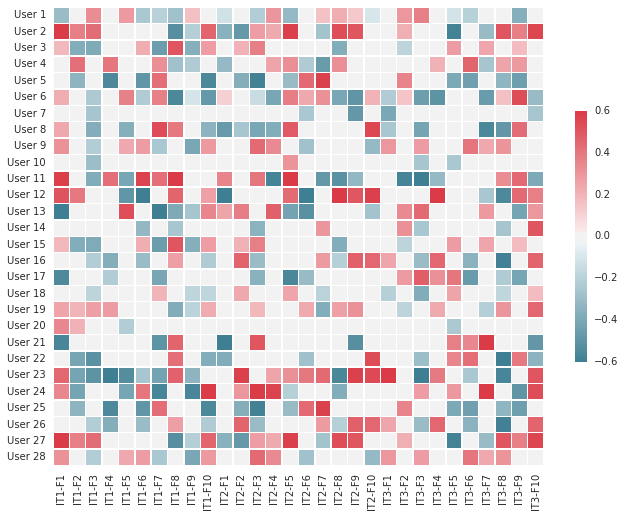

In [452]:
data = pd.DataFrame()
for input_representation in [2,3,4]:
    cp = CorPlot(input_representation=input_representation, sd_ratio=0.25)
    cp.findBestTimeWindow()
    a = cp.createCorDataFrame()
    a.columns  = ['IT'+ str(input_representation-1) + '-' + i for i in a.columns]
    if data.empty:
        data = a
    else:
        data = pd.concat([data, a], axis=1)
        
a = list(data.get_values())
a[14] = a[2]
a.append(a[4])
a.append(a[15])
a.append(a[1])
a.append(a[8])
data2 = pd.DataFrame(a)
data2.columns = data.columns
a = list(data.index)
a.append('User 25')
a.append('User 26')
a.append('User 27')
a.append('User 28')
data2.index = a
CorPlot.plotHeatMap(data2, file_path='plots/corr_plot_matrix.pdf')


avg_cor = []
for f in data2.columns:
    m = np.mean([abs(n) for n in data2[f]])
    avg_cor.append([f, m])
avg_cor

In [435]:
data2

,IT1-F1,IT1-F2,IT1-F3,IT1-F4,IT1-F5,IT1-F6,IT1-F7,IT1-F8,IT1-F9,IT1-F10,...,IT3-F1,IT3-F2,IT3-F3,IT3-F4,IT3-F5,IT3-F6,IT3-F7,IT3-F8,IT3-F9,IT3-F10
User 1,-0.119981,0.000000,-0.219468,0.301144,-0.310454,0.000000,0.156324,0.221526,0.134971,-0.098695,...,-0.119981,0.000000,-0.219468,0.301144,-0.310454,0.000000,0.156324,0.221526,0.134971,-0.098695
User 2,-0.355629,-0.471221,0.274673,0.233373,0.575580,0.000000,-0.263132,0.532049,0.510286,0.000000,...,-0.355629,-0.471221,0.274673,0.233373,0.575580,0.000000,-0.263132,0.532049,0.510286,0.000000
User 3,0.000000,0.208258,0.371886,0.000000,0.000000,0.000000,0.000000,-0.377427,0.000000,0.000000,...,0.000000,0.208258,0.371886,0.000000,0.000000,0.000000,0.000000,-0.377427,0.000000,0.000000
User 4,-0.312329,0.000000,0.000000,0.248600,0.322660,-0.228823,-0.456693,0.321540,0.000000,0.000000,...,-0.312329,0.000000,0.000000,0.248600,0.322660,-0.228823,-0.456693,0.321540,0.000000,0.000000
User 5,0.000000,-0.368557,-0.581319,0.000000,-0.306510,0.446195,0.573111,0.000000,0.000000,0.000000,...,0.000000,-0.368557,-0.581319,0.000000,-0.306510,0.446195,0.573111,0.000000,0.000000,0.000000
User 6,0.113032,0.000000,-0.146779,-0.410122,0.377348,0.238751,0.315049,-0.407336,-0.491961,0.206021,...,0.113032,0.000000,-0.146779,-0.410122,0.377348,0.238751,0.315049,-0.407336,-0.491961,0.206021
User 7,0.000000,0.000000,0.000000,0.000000,0.000000,-0.246470,0.000000,0.000000,-0.476295,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.246470,0.000000,0.000000,-0.476295,0.000000
User 8,-0.464883,-0.253535,-0.405683,-0.375666,0.490894,0.000000,0.000000,0.000000,0.000000,0.557086,...,-0.464883,-0.253535,-0.405683,-0.375666,0.490894,0.000000,0.000000,0.000000,0.000000,0.557086
User 9,0.000000,0.000000,0.449126,0.338717,0.000000,-0.274300,0.000000,0.000000,0.000000,-0.312510,...,0.000000,0.000000,0.449126,0.338717,0.000000,-0.274300,0.000000,0.000000,0.000000,-0.312510
User 10,0.000000,0.000000,0.000000,0.000000,0.304736,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.304736,0.000000,0.000000,0.000000,0.000000,0.000000
